## Breit-Wigner Loss Function

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.special import factorial
import scipy.optimize as opt
from scipy.optimize import fsolve

The Relativistic Breit–Wigner Distribution is used as the new loss function to see any changes that may happen.

$$ Loss Function = - \frac{k}{\left(E^2-M^2\right)^2+M^2\Gamma^2} $$

where $\Gamma=2$ and $K=1$.

$E$ is the W boson equation:

$$W\left(\nu _z\right)=\sqrt{2\left|\mathbf{p}_{\mu }\right|\sqrt{\nu _x^2+\nu _y^2+\nu _z^2}-2\left(\mu _x\nu _x+\mu _y\nu _y+\mu _z\nu _z\right)}$$

and $M$ is the rest mass of W boson which is $W_0=80.318$ $GeV$, but with the smearing effect $W_0$ can be slightly changed.

In [3]:
### Importing Data

ro_skip = []
for i in range(0,1000):
    skip0 = 0 + i*12
    skip1 = 1 + i*12
    skip2 = 2 + i*12
    ro_skip.append(skip0)
    ro_skip.append(skip1)
    ro_skip.append(skip2)


data = pd.read_table('evrecWWmu.dat',skiprows=ro_skip,delim_whitespace=True, names=['M.C.N', 'Unknown1', 'Unknown2', 'Unknown3','Unknown4','Unknown5','Px','Py','Pz','E','M','Unknown6','Unknown7'])

## Cutting the unnecessary values ##
data = data.loc[:, ~data.columns.isin(['Unknown1', 'Unknown2', 'Unknown3', 'Unknown4', 'Unknown5', 'Unknown6', 'Unknown7'])]

## Locating an event ##
event_name = {}
for x in range(1,1001):
    event_name["event{0}".format(x)] = ()

start_point = 0
end_point = 9

for name in event_name:
            
        globals()[name] = data.iloc[start_point:end_point].reset_index(drop=True)
        
        start_point = start_point + 9        
        end_point = start_point +9

In [5]:
pzrecon = np.empty((0,3), int)
pzmsure = np.empty((0,3), int)

for i in range(1,1001):
    
    neutrinoPx = - globals()[f'event{i}'].Px[6] - globals()[f'event{i}'].Px[7] - globals()[f'event{i}'].Px[8] 
    neutrinoPy = - globals()[f'event{i}'].Py[6] - globals()[f'event{i}'].Py[7] - globals()[f'event{i}'].Py[8]
    testp_muon = np.sqrt(globals()[f'event{i}'].Px[6]**2 + globals()[f'event{i}'].Py[6]**2 + globals()[f'event{i}'].Pz[6]**2)

    def W(vz): # W function
        return np.sqrt(2*testp_muon*np.sqrt(neutrinoPx**2+neutrinoPy**2+vz**2)-2*(globals()[f'event{i}'].Px[6]*neutrinoPx+globals()[f'event{i}'].Py[6]*neutrinoPy+globals()[f'event{i}'].Pz[6]*vz))
    def LF(vz):
        return -1*(((W(vz))**2 - 80.318**2)**2 + 80.318**2 * 4)**-1
    
    print("V_z reconstructed (GeV)", opt.minimize(LF,globals()[f'event{i}'].Pz[5]).x, "actual is (GeV)",globals()[f'event{i}'].Pz[5],"for event",i)
    pzrecon = np.append(pzrecon,opt.minimize(LF,globals()[f'event{i}'].Pz[5]).x)
    pzmsure = np.append(pzmsure,globals()[f'event{i}'].Pz[5])

V_z reconstructed (GeV) [-347.459313] actual is (GeV) -347.459313 for event 1
V_z reconstructed (GeV) [-26.2969208] actual is (GeV) -26.5114289 for event 2
V_z reconstructed (GeV) [-761.586622] actual is (GeV) -761.586622 for event 3
V_z reconstructed (GeV) [-85.0004735] actual is (GeV) -85.0004735 for event 4
V_z reconstructed (GeV) [285.414183] actual is (GeV) 285.414183 for event 5
V_z reconstructed (GeV) [14.36941726] actual is (GeV) 14.3073037 for event 6
V_z reconstructed (GeV) [674.758869] actual is (GeV) 674.758869 for event 7
V_z reconstructed (GeV) [326.265119] actual is (GeV) 326.265119 for event 8
V_z reconstructed (GeV) [-406.468727] actual is (GeV) -406.468727 for event 9
V_z reconstructed (GeV) [8.31658121] actual is (GeV) 8.31658121 for event 10
V_z reconstructed (GeV) [910.820119] actual is (GeV) 910.820119 for event 11
V_z reconstructed (GeV) [-145.271333] actual is (GeV) -145.271333 for event 12
V_z reconstructed (GeV) [17.2417763] actual is (GeV) 17.2417763 for even

The rms of the distribution is  0.2029821098706587


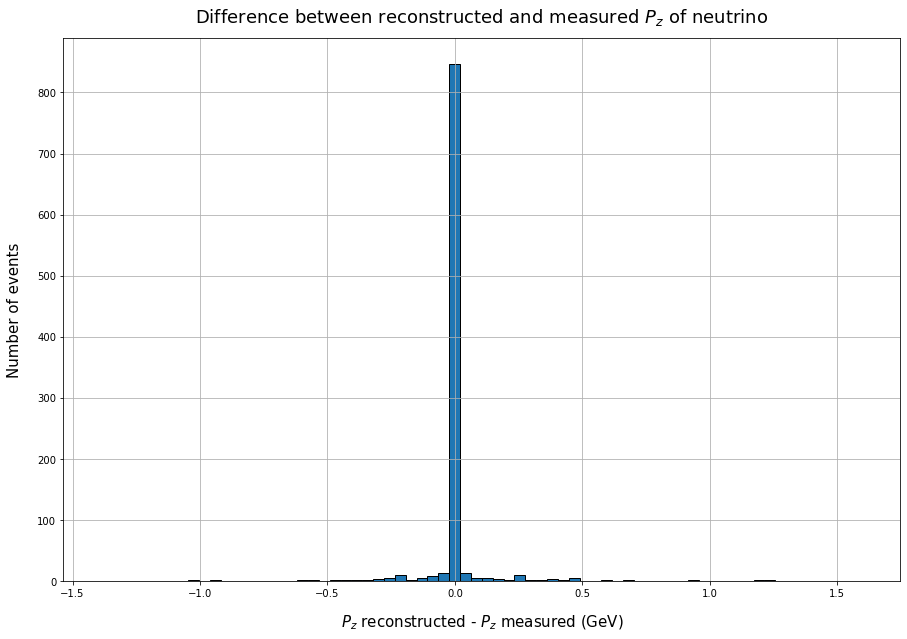

In [205]:
diffpz = pzrecon-pzmsure
plt.figure(figsize=[15,10])
plt.hist(diffpz,bins = 70, ec='black')
plt.grid(True)
plt.xlabel("$P_z$ reconstructed - $P_z$ measured (GeV)",labelpad = 15, size= 15)
plt.ylabel("Number of events",labelpad = 15, size= 15)
plt.title("Difference between reconstructed and measured $P_z$ of neutrino",pad = 15, size= 18);
rms = np.sqrt(np.mean(diffpz**2)) # rms of the distribution
print("The rms of the distribution is ", rms)

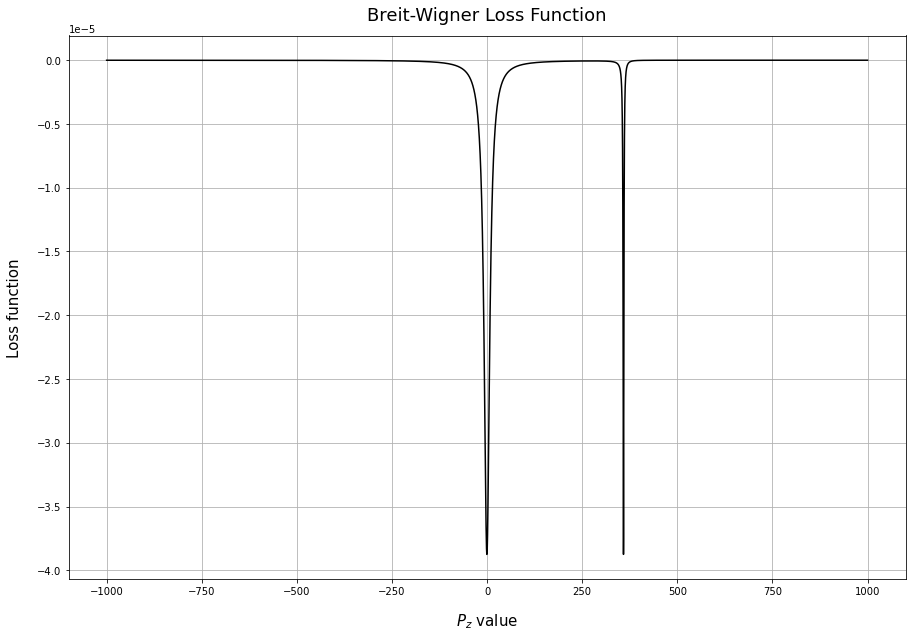

In [206]:
## EVENT 1 TEST ##
vzrange = np.linspace(-1000,1000,100000)
n=1

## INFO FOR EVENT 1 ##
neutrinoPx = - globals()[f'event{n}'].Px[6] - globals()[f'event{n}'].Px[7] - globals()[f'event{n}'].Px[8] 
neutrinoPy = - globals()[f'event{n}'].Py[6] - globals()[f'event{n}'].Py[7] - globals()[f'event{n}'].Py[8]
testp_muon = np.sqrt(globals()[f'event{n}'].Px[6]**2 + globals()[f'event{n}'].Py[6]**2 + globals()[f'event{n}'].Pz[6]**2)

def W(vz): # W function
        return np.sqrt(2*testp_muon*np.sqrt(neutrinoPx**2+neutrinoPy**2+vz**2)-2*(globals()[f'event{n}'].Px[6]*neutrinoPx+globals()[f'event{n}'].Py[6]*neutrinoPy+globals()[f'event{n}'].Pz[6]*vz))
def LF(vz):
        return -1*(((W(vz+globals()[f'event{n}'].Pz[5]))**2 - 80.318**2)**2 + 80.318**2 * 4)**-1

plt.figure(figsize=[15,10])
plt.plot(vzrange,LF(vzrange),color="black")
plt.xlabel("$P_z$ value",labelpad = 15, size= 15)
plt.ylabel("Loss function",labelpad = 15, size= 15)
plt.title("Breit-Wigner Loss Function",pad = 15, size= 18);
plt.grid(True);

In [207]:
reconWx = np.empty((0,3), int)
reconWy = np.empty((0,3), int)
reconWz = np.empty((0,3), int)
reconWxtrue = np.empty((0,3), int)
reconWytrue = np.empty((0,3), int)
reconWztrue = np.empty((0,3), int)

for y in range(1,1001):
    ##Px##
    neutrinoPx = - globals()[f'event{y}'].Px[6] - globals()[f'event{y}'].Px[7] - globals()[f'event{y}'].Px[8]
    ##Py##
    neutrinoPy = - globals()[f'event{y}'].Py[6] - globals()[f'event{y}'].Py[7] - globals()[f'event{y}'].Py[8]
    ##Magnitude of muon momentum##
    p_muon = np.sqrt(globals()[f'event{y}'].Px[6]**2 + globals()[f'event{y}'].Py[6]**2 + globals()[f'event{y}'].Pz[6]**2)
    
    def W(vz): # W function
        return np.sqrt(2*testp_muon*np.sqrt(neutrinoPx**2+neutrinoPy**2+vz**2)-2*(globals()[f'event{i}'].Px[6]*neutrinoPx+globals()[f'event{i}'].Py[6]*neutrinoPy+globals()[f'event{i}'].Pz[6]*vz))
    def LF(vz):
        return -1*(((W(vz))**2 - 80.318**2)**2 + 80.318**2 * 4)**-1
    
    ##Reconstructing the W by momentum cons##
    reconW_x = neutrinoPx + globals()[f'event{y}'].Px[6]
    reconW_y = neutrinoPy + globals()[f'event{y}'].Py[6]
    reconW_z = opt.minimize(LF,globals()[f'event{y}'].Pz[5]).x + globals()[f'event{y}'].Pz[6]
    print("first try is",reconW_z,"for event", y, "actual is", globals()[f'event{y}'].Pz[3])
    
    ##filling arrays as usual##
    reconWx = np.append(reconWx,reconW_x)
    reconWy = np.append(reconWy,reconW_y)
    reconWz = np.append(reconWz,reconW_z)
    reconWxtrue = np.append(reconWxtrue,globals()[f'event{y}'].Px[3])
    reconWytrue = np.append(reconWytrue,globals()[f'event{y}'].Py[3])
    reconWztrue = np.append(reconWztrue,globals()[f'event{y}'].Pz[3])

first try is [-403.1888103] for event 1 actual is -403.18881
first try is [-302.4020879] for event 2 actual is -302.402088
first try is [-1583.281092] for event 3 actual is -1583.28109
first try is [-227.7269525] for event 4 actual is -227.726953
first try is [1219.067918] for event 5 actual is 1219.06792
first try is [-33.1651344] for event 6 actual is -33.1651343
first try is [740.4074789] for event 7 actual is 740.407479
first try is [356.5159753] for event 8 actual is 356.515976
first try is [-617.864949] for event 9 actual is -617.864949
first try is [52.03460421] for event 10 actual is 52.0346042
first try is [1084.662228] for event 11 actual is 1084.66223
first try is [-144.67399779] for event 12 actual is -144.673998
first try is [50.5772443] for event 13 actual is 50.5772443
first try is [-123.9212265] for event 14 actual is -123.921226
first try is [-438.616368] for event 15 actual is -438.616368
first try is [-503.42356403] for event 16 actual is -503.423564
first try is [38

The rms of the distribution is  0.11710333732111315


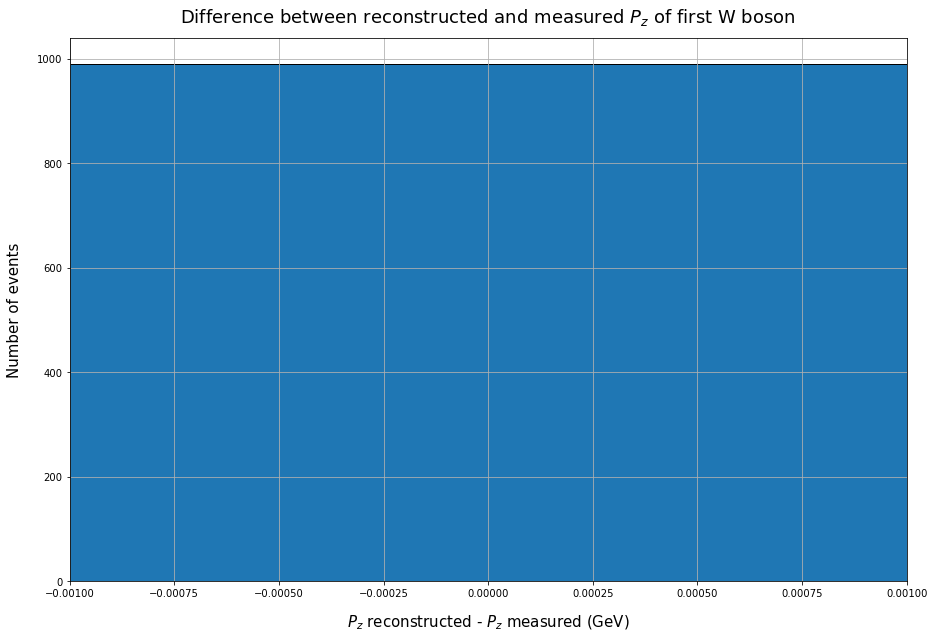

In [209]:
diffpz = reconWz-reconWztrue
plt.figure(figsize=[15,10])
plt.hist(diffpz,bins = 50, ec='black')
plt.grid(True)
plt.xlabel("$P_z$ reconstructed - $P_z$ measured (GeV)",labelpad = 15, size= 15)
plt.ylabel("Number of events",labelpad = 15, size= 15)
plt.title("Difference between reconstructed and measured $P_z$ of first W boson",pad = 15, size= 18)
plt.xlim(-0.001,0.001);
rms = np.sqrt(np.mean(diffpz**2)) # rms of the distribution
print("The rms of the distribution is ", rms)

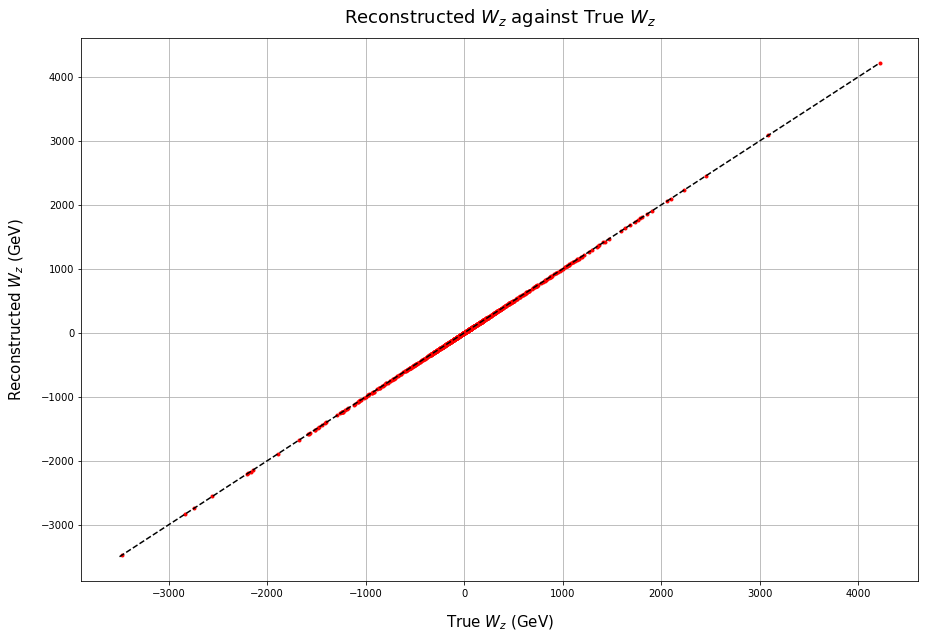

In [210]:
plt.figure(figsize=[15,10])
plt.plot(reconWztrue,reconWz,".",color="red")
plt.plot(np.linspace(-3500,4200,400),np.linspace(-3500,4200,400),"--",color="black")
plt.grid(True)
plt.ylabel("Reconstructed $W_z$ (GeV)",labelpad = 15, size= 15)
plt.xlabel("True $W_z$ (GeV)",labelpad = 15, size= 15)
plt.title("Reconstructed $W_z$ against True $W_z$",pad = 15, size= 18);

In [211]:
theta1ARRAY = np.empty((0,3), int) #first W

for i in range(1,1001):
    dotprod1 = reconWx[i-1]*globals()[f'event{i}'].Px[3]+reconWy[i-1]*globals()[f'event{i}'].Py[3]+reconWz[i-1]*globals()[f'event{i}'].Pz[3]
    abs1 = np.sqrt(reconWx[i-1]**2+reconWy[i-1]**2+reconWz[i-1]**2)*np.sqrt(globals()[f'event{i}'].Px[3]**2+globals()[f'event{i}'].Py[3]**2+globals()[f'event{i}'].Pz[3]**2)
    theta1 = np.arccos(dotprod1/abs1)*(180/np.pi) #angle for first W boson in degrees
    
    
    theta1ARRAY = np.append(theta1ARRAY,theta1)  

The rms of the distribution is  0.20054547659122757


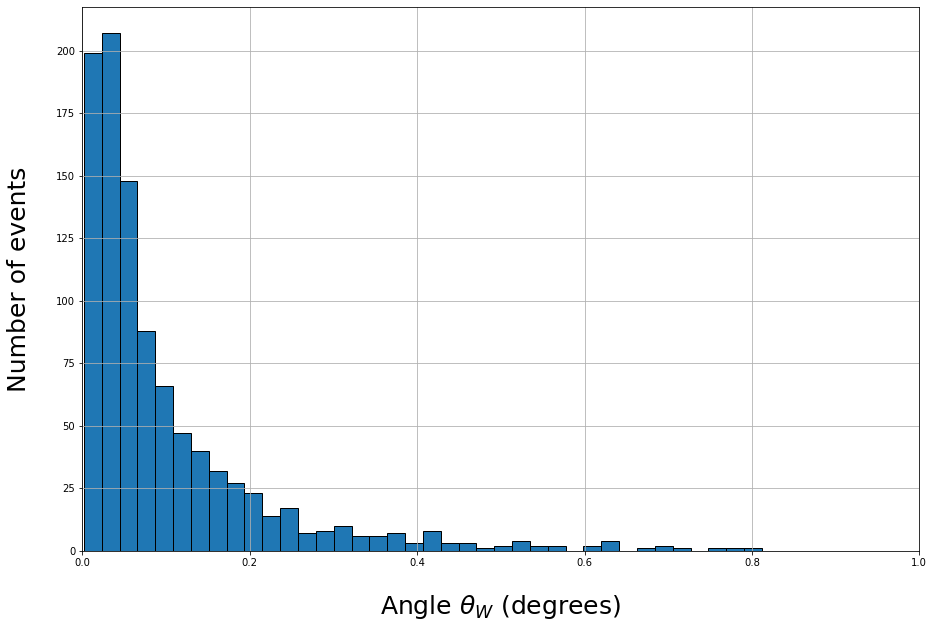

In [214]:
## Angle distribution for theta ##
plt.figure(figsize=[15,10])
# plt.hist([theta1ARRAY,theta2ARRAY],bins = 10)
plt.hist(theta1ARRAY,bins = 100,  ec='black')
plt.grid(True)
plt.ylabel(r"Number of events",labelpad = 25, size= 25)
plt.xlabel(r"Angle $\theta_W$ (degrees)",labelpad = 25, size= 25)
plt.xlim(0,1)
rms = np.sqrt(np.mean(theta1ARRAY**2)) # rms of the distribution
print("The rms of the distribution is ", rms)

In [ ]:
## Angle distribution for theta ##
plt.figure(figsize=[15,10])
# plt.hist([theta1ARRAY,theta2ARRAY],bins = 10)
plt.hist(theta1ARRAY,bins = 100,  ec='black')
plt.grid(True)
plt.ylabel(r"Number of events",labelpad = 25, size= 25)
plt.xlabel(r"Angle $\theta_W$ (degrees)",labelpad = 25, size= 25)
rms = np.sqrt(np.mean(theta1ARRAY**2)) # rms of the distribution
print("The rms of the distribution is ", rms)